<a href="https://colab.research.google.com/github/zmwaris1/flight_price_predict/blob/main/flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Travelling through flights has become an integral part of today’s lifestyle as more and
more people are opting for faster travelling options. The flight ticket prices increase or
decrease every now and then depending on various factors like timing of the flights,
destination, and duration of flights various occasions such as vacations or festive
season. Therefore, having some basic idea of the flight fares before planning the trip will
surely help many people save money and time.
The main goal is to predict the fares of the flights based on different factors available in
the provided dataset.

Approach: The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

# **Flight Fare Prediction**

In this project we are going to analyse data for flight prices and then use the data to build a ML model to predict prices for future.

In [1]:
# importing the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I will be using opendataset library to import the dataset from kaggle. To do that you just need "**kaggle.json**" file which you can download from your kaggle profile.

In [2]:
!pip install opendatasets
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
path = "https://www.kaggle.com/datasets/abhinavraja/flight-prices"

In [4]:
od.download(path)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: zafarmahmoodwaris
Your Kaggle Key: ··········


100%|██████████| 161k/161k [00:00<00:00, 45.9MB/s]

Dataset : I will be using the dataset from the given link:
> path = "https://www.kaggle.com/datasets/abhinavraja/flight-prices"

The dataset includes following features:
1. Airline - The name of the airline company.
2. Date_of_Journey - The date on which the passenger is planning to take a flight.
3. Source - City from where flight takes off.
4. Destination - City upto where the flight is going.
5. Route - The route a particular flight is going to follow.
6. Dep_Time - Departure time of flight from source.
7. Arrival_Time - Arrival time of flight on the destination.
8. Duration - The total time of the flight.
9. Total_Stops - Total nunber of stops in between source and destination.
10. Additional_Info - Any additional information about the flight.
11. Price - Price of the flight.

## **Importing the dataset.**
1. We use pandas to import and display the dataset.
2. After loading data we perform Feature Engineering and EDA.


In [5]:
df = pd.read_csv("/content/flight-prices/Data_Train.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


After importing the dataset we need to analyse and clean it of mising values, outliers, and impute if any categorical value is there.

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Columns "Route" and "Total_Stops" has only one null values each. So dropping the rows with null values won't affect the model much.

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

After cleaning the data of mssing values we need to find the right data type for the object to use in model buiding and prediction.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


# Performing EDA
From data info we could see that columns "Date_of_Journey", "Arrival_Time" and "Departure_Time" are object type. We have to convert them to tmestamp to extract time, day and month.

For this we are going to use **to_datetime** method from pandas library.
Then we will use **.dt.day** to extarct day of travel and **.dt.month** to extract month of travel

In [11]:
# Extracting day of travel.
df["Journey_Day"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day

# Extracting month of travel.
df["Journey_Month"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.month

In [12]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [13]:
# Extracting Hours
df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

# Extracting minutes
df["Dep_Min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df["Arrival_Min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Arrival_Hour,Dep_Min,Arrival_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,1,20,10


Now we should drop the original columns.

In [14]:
df.drop(["Date_of_Journey"], axis=1, inplace=True)
df.drop(["Dep_Time"], axis=1, inplace=True)
df.drop(["Arrival_Time"], axis=1, inplace=True)

In [15]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Arrival_Hour,Dep_Min,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,21,50,35


In [16]:
# checking dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Journey_Day      10682 non-null  int64 
 9   Journey_Month    10682 non-null  int64 
 10  Dep_Hour         10682 non-null  int64 
 11  Arrival_Hour     10682 non-null  int64 
 12  Dep_Min          10682 non-null  int64 
 13  Arrival_Min      10682 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.2+ MB


We have to extract numerical values from **duration** column in the form of **duration_hours** and **duration_mins**. So we will use python code to extract the information.

In [17]:
# First we convert the duration column to a list.

duration = list(df["Duration"])

for i in range(len(duration)):
  if len(duration[i].split()) != 2:         # Check whether the duration column only has hour or minutes.
    if "h" in duration[i]:                          # If it has only hour we add 0m.
      duration[i] = duration[i] + " " + "0m"
    else:                                                 # If it has only minutes we add 0h.
      duration[i] = "0h" + " " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep = "h")[0]))                         # Then we split the values on "h" and "m" and we add the values to the respective lists.
  duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

After forming seperate lists for duration_hours and duration_mins we add them to our dataset and drop our Duration column.

In [18]:
df["Duration_in_hours"] = duration_hours
df["Duration_in_mins"] = duration_mins
df.drop(["Duration"], axis=1, inplace=True)

In [19]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Arrival_Hour,Dep_Min,Arrival_Min,Duration_in_hours,Duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,21,50,35,4,45


# Further we have to handle categorical data.

We have two poular methods for handling categorical data.
1. <font color='red'>**One Hot Encoding**</font> --> When the data is Nominal and not in order
2. <font color='red'>**Label Encoding**</font> --> When the data is Ordinal and in order

In [20]:
# from the dataset we need to find the columns which are categorical

df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

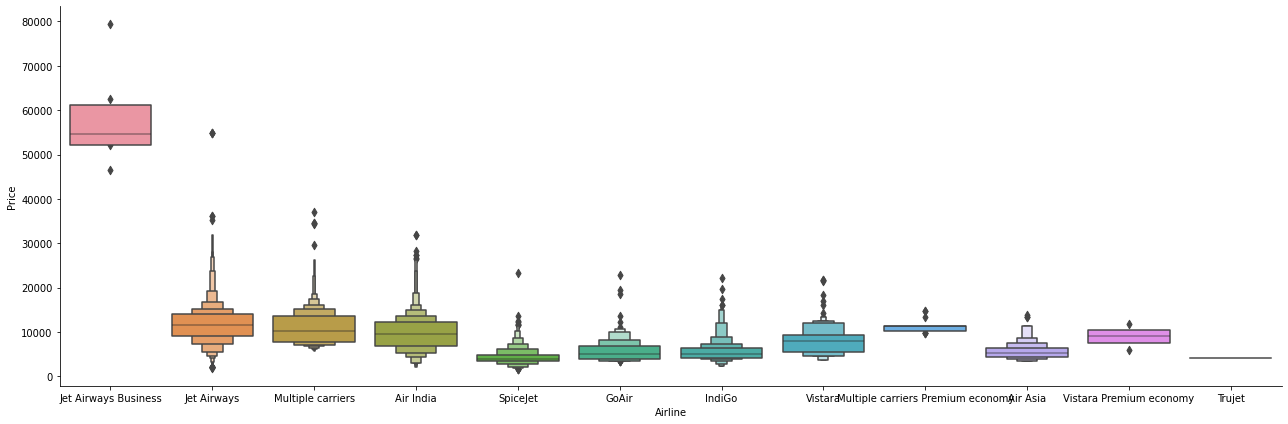

In [21]:
# Airline vs Price plot
sns.catplot(y = "Price", x = "Airline", data=df.sort_values("Price",ascending=False), kind="boxen", height=6, aspect = 3)

In the graph we could see that Jet Airways Business has the highest price.

In [22]:
# since the Airline column falls has Nominal categories we use One-Hot Encoding
# To perform One-Hot Encoding we get_dummies from pandas library.

Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [23]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

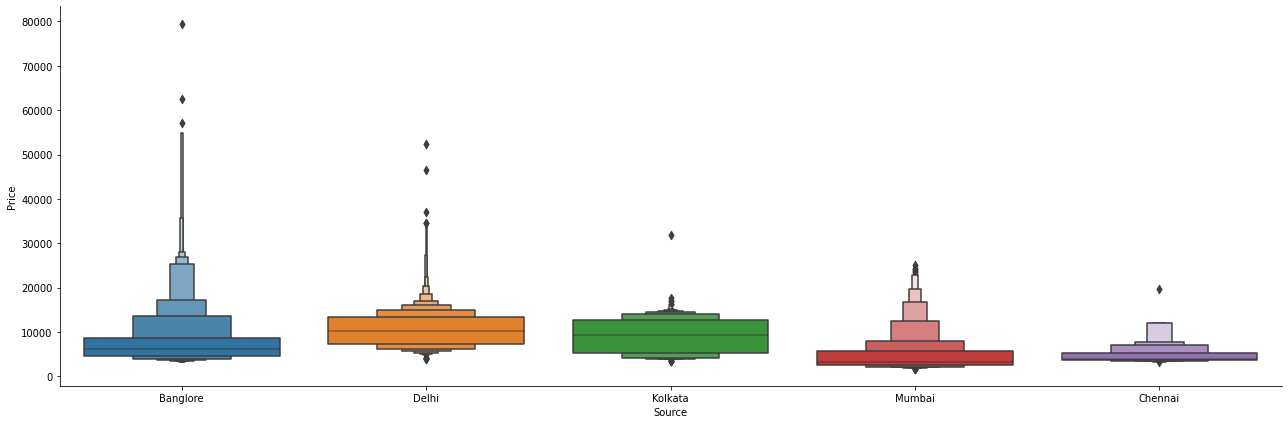

In [24]:
# Source vs Price plot
sns.catplot(y = "Price", x = "Source", data=df.sort_values("Price",ascending=False), kind="boxen", height=6, aspect = 3)

In [25]:
# Source is also having nominal categories so we will use One-Hot Encoding.

Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [26]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [27]:
# Destination has Nominal values so we use One-Hot Encoding.

Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [28]:
# Since additional info and route column does not much affect the flight fare so we are dropping it.
df.drop(["Route", "Additional_Info"], axis=1, inplace=True)

In [29]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [30]:
# Now Total_Stops columns has ordinal values so we perform Label Encoding.

df.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace = True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Arrival_Hour,Dep_Min,Arrival_Min,Duration_in_hours,Duration_in_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,21,50,35,4,45


In [31]:
# Now we add the columns to the dataframe on which we use encoding techniques.

data = pd.concat([df, Airline, Source, Destination], axis=1)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Arrival_Hour,Dep_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,1,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,13,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,4,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,23,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,21,50,...,0,0,0,0,0,0,0,0,0,1


In [32]:
# We drop the original columns.

data.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)
data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Arrival_Hour,Dep_Min,Arrival_Min,Duration_in_hours,Duration_in_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,1,20,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,13,50,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,4,25,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,23,5,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,21,50,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [33]:
data.shape

(10682, 30)

# Feature Selection
In this portion we will select the best features that are related to target variable. This will produce better predictions. Some methods of feature selection are:
1. Correlation matrix
2. feature_importance_
3. SelectKBest

Splitting our independent and dependent columns and assigning them to **"X"** and **"y"**.

In [34]:
X = data.drop(columns = "Price", axis=1)

In [35]:
X.shape

(10682, 29)

In [36]:
pd.set_option('display.max_columns', None)
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Arrival_Hour,Dep_Min,Arrival_Min,Duration_in_hours,Duration_in_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,1,20,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,13,50,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,4,25,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,23,5,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,21,50,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
y = data["Price"]

In [38]:
y.shape

(10682,)

In [39]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

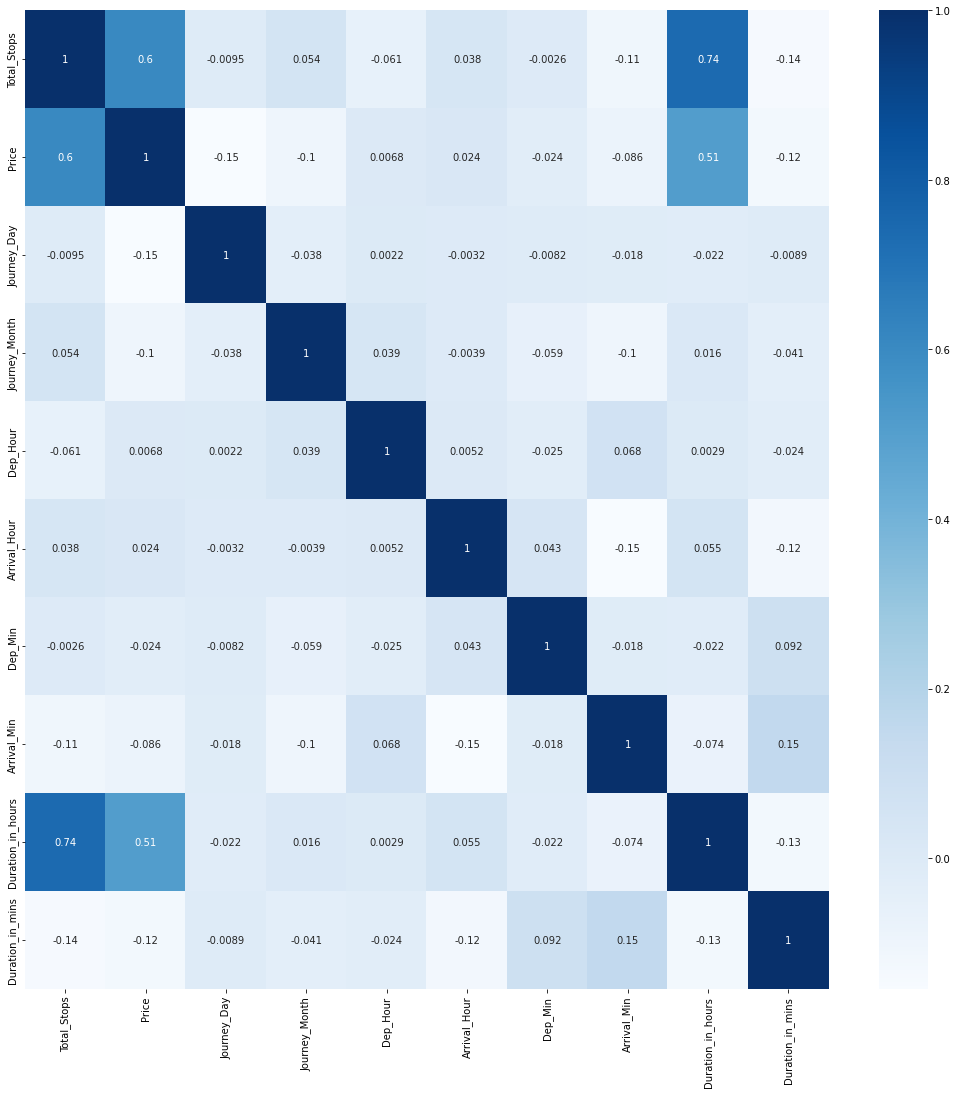

In [40]:
# Plotting correlation matrix to find relation between independent features and dependent variable.
# We will try to drop one of the independent feature if any two have columns a correlation coefficient greater than 0.9.

plt.figure(figsize = (18, 18))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

There are no two columns which have a correlation coefficient of 0.9 so we are not dropping any column.

# Model Building

# Using ExtraTreesRegressor
1. Fit the data
2. Predict
3. Check RMSE Score
4. Plot

In [92]:
# Splitting the dataset into training and testing data.
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [87]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train, y_train)

ExtraTreesRegressor()

In [88]:
pred1 = selection.predict(X_test)

In [90]:
print(selection.score(X_train, y_train))
print(selection.score(X_test, y_test))

0.9697460380287246
0.7943164773907152


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


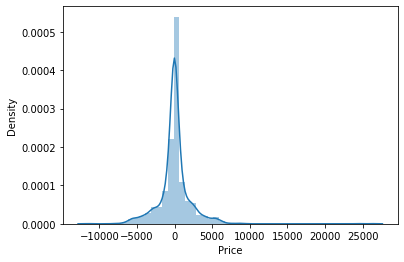

In [91]:
sns.distplot(y_test-pred1)
plt.show()

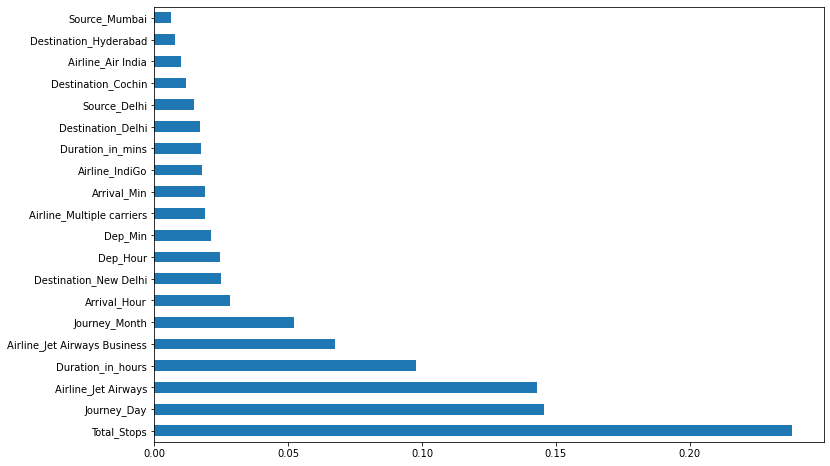

In [43]:
plt.figure(figsize = (12, 8))
features_imp = pd.Series(selection.feature_importances_, index=X.columns)
features_imp.nlargest(20).plot(kind="barh")
plt.show()

In [93]:
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))

MAE: 1229.506980502262
MSE: 4575042.0722037135
RMSE: 2138.934798492865


In [94]:
metrics.r2_score(y_test, pred1)

0.7943164773907152

# Using Random Forest
1. Fit the data
2. Predict
3. Check RMSE Score
4. Plot

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
y_pred = rfg.predict(X_test)

In [47]:
rfg.score(X_train, y_train)

0.9549664248906429

In [48]:
rfg.score(X_test, y_test)

0.7797620522759079

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


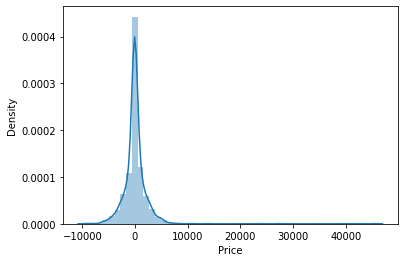

In [49]:
sns.distplot(y_test-y_pred)
plt.show()

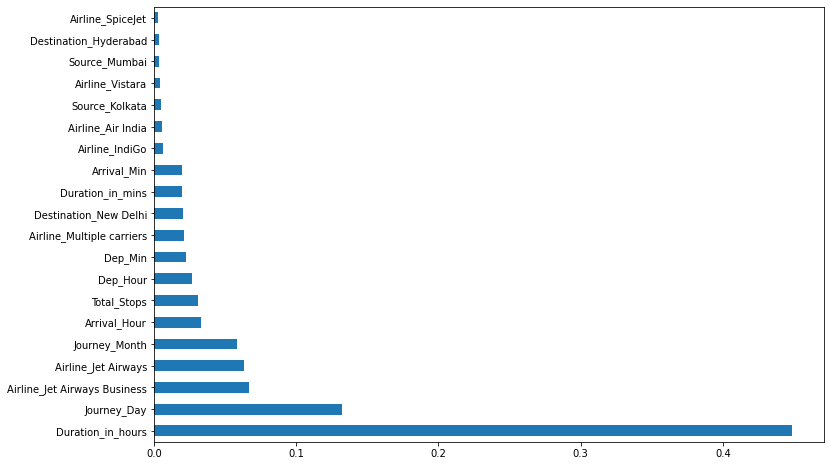

In [75]:
plt.figure(figsize = (12, 8))
features_imp = pd.Series(rfg.feature_importances_, index=X.columns)
features_imp.nlargest(20).plot(kind="barh")
plt.show()

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1198.0201718792307
MSE: 4898777.811422213
RMSE: 2213.318280641583


In [52]:
metrics.r2_score(y_test, y_pred)

0.7797620522759079

# Using hyperparameter tuning

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
n_estimators = [int(x) for  x in np.linspace(start=100, stop=1000, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [55]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [56]:
rf = RandomizedSearchCV(estimator = rfg, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state=2, n_jobs=1)

In [57]:
rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=672; total time=   8.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=672; total time=  13.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=672; total time=   7.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=672; total time=   6.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=672; total time=   6.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=836; total time=  11.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=836; total time=  11.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]},
                   random_state=2, scoring='neg_mean_squared_error', verbose=2)

In [58]:
rf.best_params_

{'n_estimators': 754,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [76]:
rf_reg = rf.best_estimator_
rf_reg

RandomForestRegressor(max_depth=30, n_estimators=754)

In [80]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=754)

In [81]:
y_pred2 = rf_reg.predict(X_test)

In [95]:
rf_reg.score(X_train, y_train)

0.9559373297026046

In [96]:
rf_reg.score(X_test, y_test)

0.7809482578852379

In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 1192.8724391068968
MSE: 4872392.904648335
RMSE: 2207.3497467887446


In [85]:
metrics.r2_score(y_test, y_pred2)

0.7809482578852379

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


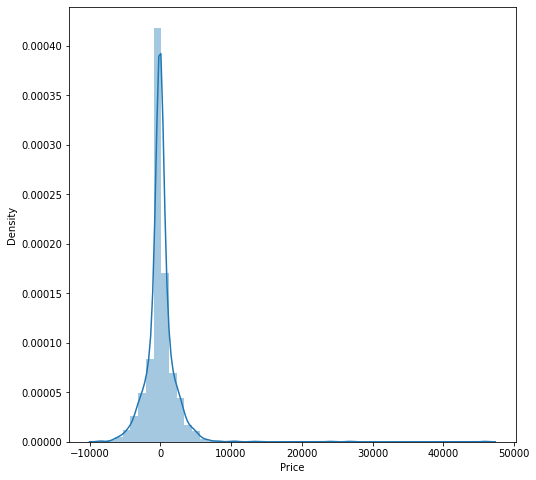

In [83]:
plt.figure(figsize = (8, 8))
sns.distplot(y_test-y_pred2)
plt.show()

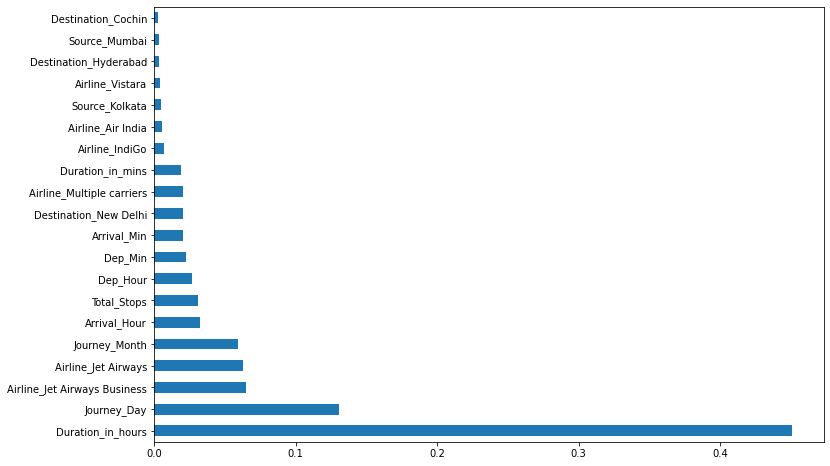

In [84]:
plt.figure(figsize = (12, 8))
features_imp = pd.Series(rf_reg.feature_importances_, index=X.columns)
features_imp.nlargest(20).plot(kind="barh")
plt.show()

# Conclusion

Based on RMSE score of the different models the Random Forest model with hyperparameter tuning has the lowest value with less overfitting. So it is the best fit model for our dataset and also going to provide best predictions.